In [1]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

Define the dataset

In [2]:
dataset = make_swiss_roll(10000, noise=1, random_state=42)
X = dataset[0]
y = dataset[1]

Look at it

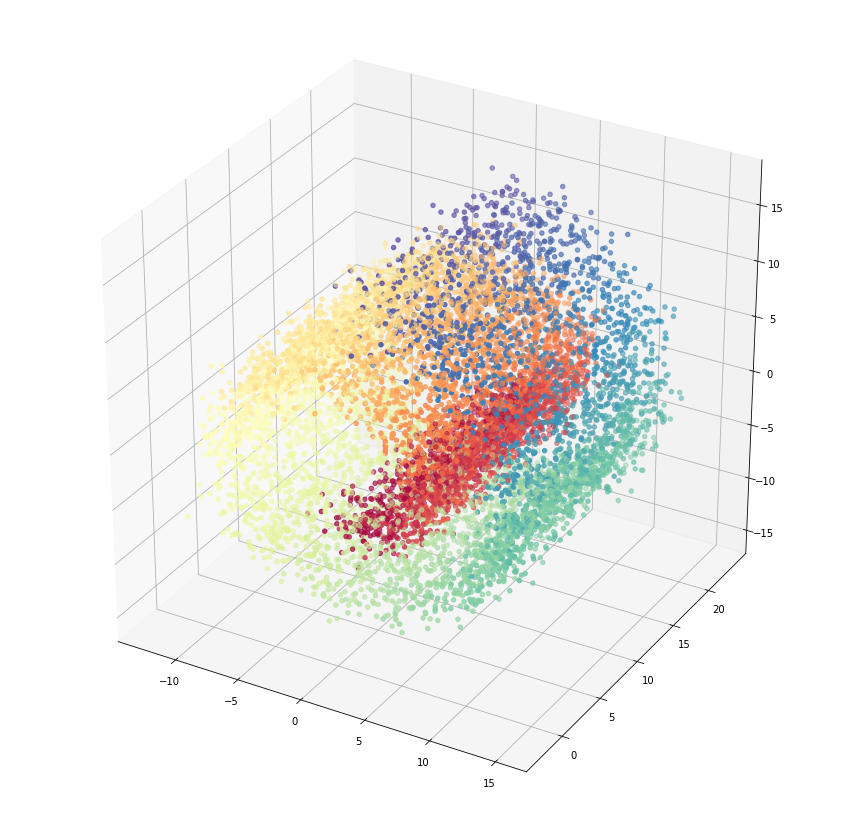

In [3]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

Scale the data to 0 mean and variance 1

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
X_transformed = scaler.transform(X)

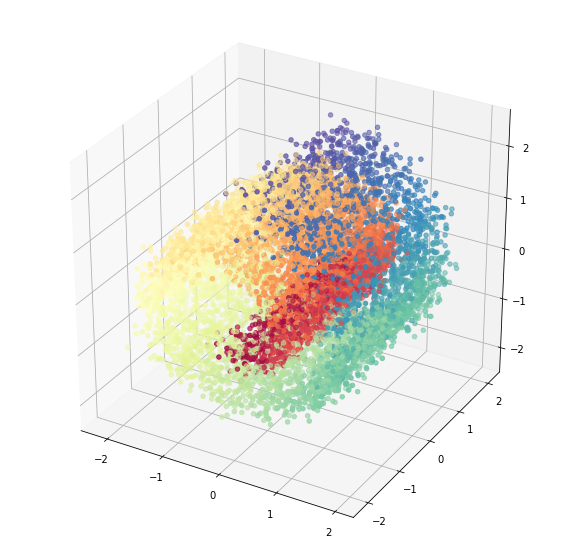

In [8]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.Spectral)

Split the dataset into training and testing sets of equal sizes

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [11]:
X_train.shape

(5000, 3)

In [12]:
from sklearn.neural_network import MLPRegressor

Define MLP with 2 hidden layers, each having 50 neurons. Since the input data X is 3-dimensional, parameter matrix from first layer $W^{[1]}$ is of size $50\times3$ the second layer parameter matrix $W^{[2]}$ is of size $50\times 50$ and the output matrix $W^{[3]}$ of size $1\times50$. Note that there is additional bias term for every row of every matrix, so in total, we have $3\times50 + 50 + 50\times50 +50 + 1\times 50 + 1=2801$ parameters in the MLP. You can inspect the weights of the matrices by calling regressor.coefs_ and biases by calling regressor.intercepts_. You can notice how they change after training (calling the fit() function).
You can read in the documentation that the loss function for this regression-MLP is squared error (equivalently MSE)
$$l(\hat{y},y)=(\hat{y}-y)^2$$

In [13]:
regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', learning_rate='adaptive')

In [14]:
regressor.hidden_layer_sizes

(50, 50)

In [15]:
regressor.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Train all the parameters of the MLP, only 200 (default) iterations

In [16]:
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [17]:
regressor.score(X_test, y_test)

0.9396166446042774

In [18]:
predictions = regressor.predict(X_test)

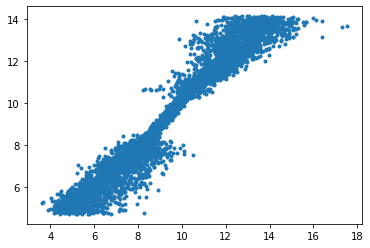

In [19]:
plt.plot(predictions, y_test, '.')

Error between predictions and target values

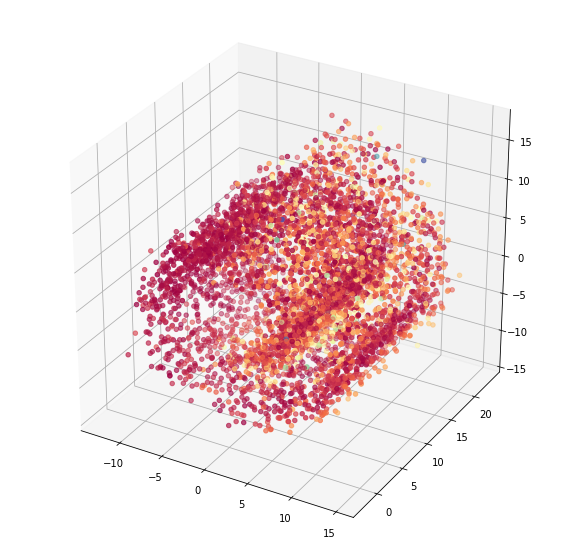

In [21]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=np.abs(y_test-predictions), cmap=plt.cm.Spectral)

In [22]:
from sklearn.pipeline import make_pipeline

Scale the data first and then train MLP. We get non-trivial improvement by scaling the data first!
Note that pipelines are typically used for preprocessing of the data (which can be quite complicated) and then we can put into a new pipeline a preprocessing pipeline and the actual classifier. There can be any number of sklearn's estimators in the pipeline, we just used 2.

In [28]:
pipeline = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', learning_rate='adaptive'))

In [29]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100, 50),
                              learning_rate='adaptive',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=200, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=None, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [32]:
pipeline.score(X_test, y_test)

0.9906152958770086

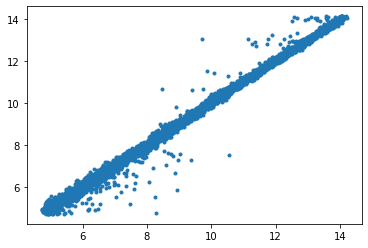

In [26]:
predictions_pipeline = pipeline.predict(X_test)
plt.plot(predictions_pipeline, y_test, '.')

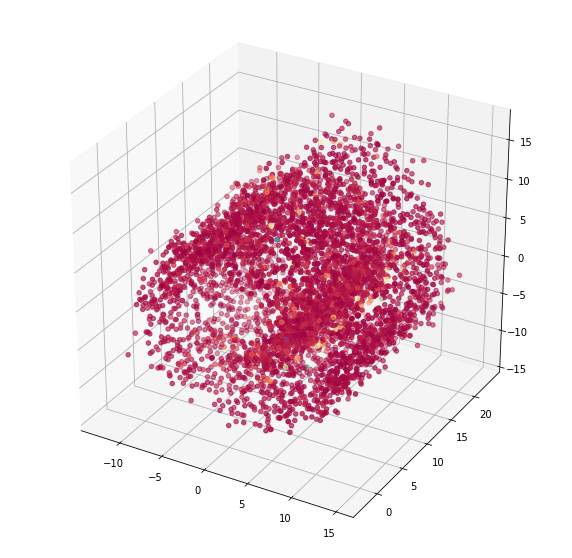

In [27]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=np.abs(y_test-predictions_pipeline), cmap=plt.cm.Spectral)

Take a look at the weights from first layer

In [ ]:
regressor.coefs_[0]